<a href="https://colab.research.google.com/github/HiteshS37/Python/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0,n_classes=2, n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
import matplotlib.pyplot as plt

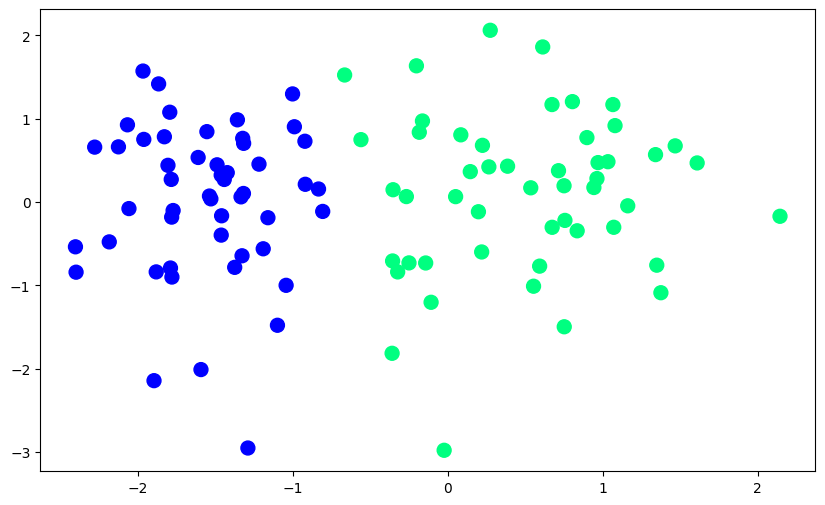

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

In [4]:
def perceptron(X,y):

    X = np.insert(X,0, 1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept_,coef_ = perceptron(X,y)

In [7]:
print(coef_)

[1.33833974 0.01998478]


In [8]:
print(intercept_)

0.9


In [9]:
print(coef_)
print(intercept_)

[1.33833974 0.01998478]
0.9


In [10]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [11]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

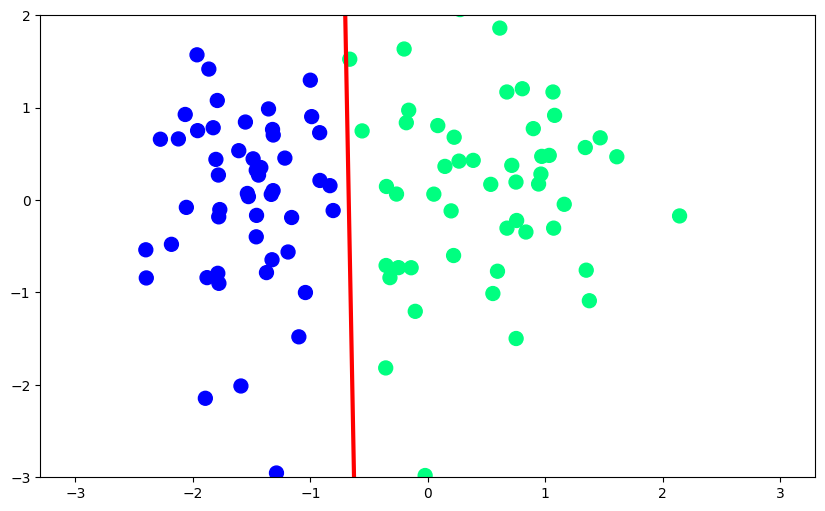

In [12]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='red', linewidth=3)
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)
plt.ylim(-3,2)

In [13]:
def perceptron(X,y):

  m = []
  b = []

  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range (200):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]
    m.append(-(weights[1]/weights[2]))
    b.append(-(weights[0]/weights[2]))

    return m,b


In [14]:
m,b = perceptron(X,y)

In [15]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [16]:
fig, aX = plt.subplots(figsize=(9,5))
X_i = np.arange(-3,3,0.1) # Use np.arange to create an array of evenly spaced values.
y_i = X_i*m[0] + b[0] # Variable m was defined in a previous cell as lowercase.
aX.scatter(X[:,0], X[:,1],c=y,cmap='winter',s=100)
line, = aX.plot(X_i,X_i*m[0] + b[0],'r-',linewidth=2)
plt.ylim(-3,2)
def update(i):
  label = 'epoch {0}'.format(i+1)
  line.set_ydata(X_i*m[i] + b[i]) # Variable m was defined in a previous cell as lowercase.
  aX.set_title(label)

anim = FuncAnimation(fig, update, repeat = True, frames = 200, interval = 500)
plt.show()

<IPython.core.display.Javascript object>